In [1]:
import pandas as pd
import numpy as np
import re
import os
import csv
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and Pre-processing

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

In [3]:
train = train[train.payprice>= train.slotprice]
valid = validation[validation.payprice>= validation.slotprice]

In [4]:
train['size']=train['slotwidth']*train['slotheight']
train['OS'], train['browser'] = zip(*train['useragent'].map(lambda x: x.split('_')))

In [5]:
train.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser,size
count,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06,2.418578e+06
mean,7.384504e-04,2.890627e+00,1.348396e+01,1.493704e+02,1.543143e+02,5.769968e+02,1.887502e+02,2.664071e+01,2.728379e+02,7.834378e+01,2.842166e+03,7.699513e+04
std,2.716441e-02,2.052143e+00,6.570215e+00,1.020371e+02,1.032834e+02,3.215217e+02,1.316413e+02,3.702365e+01,2.892883e+01,5.987735e+01,7.834149e+02,1.725780e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03,1.404000e+04
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03,6.552000e+04
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.900000e+01,3.358000e+03,7.500000e+04
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,1.000000e+02,3.427000e+03,9.000000e+04
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,1.000000e+03,6.000000e+02,2.990000e+02,3.000000e+02,3.000000e+02,3.476000e+03,1.800000e+05


In [6]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'size', 'OS', 'browser'],
      dtype='object')

# Data Exploration

# 1.Basic Statistics

In [9]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dummy = train.groupby('advertiser').payprice.sum().values
dataset_stats['cost'] = (dummy/1000).round(2)
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions)*1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,487908,384,33797.24,0.079%,69.27,88.01
1,2259,132847,43,12384.20,0.032%,93.22,288.0
2,2261,109910,36,9854.91,0.033%,89.66,273.75
3,2821,211091,131,18815.42,0.062%,89.13,143.63
4,2997,48979,214,3071.47,0.437%,62.71,14.35
5,3358,264956,202,22447.23,0.076%,84.72,111.12
6,3386,449269,317,34732.58,0.071%,77.31,109.57
7,3427,402805,272,30458.71,0.068%,75.62,111.98
8,3476,310813,187,23918.78,0.06%,76.96,127.91


# 2.Bidding Behavior Analysis

In [6]:
#Choose Advertiser 2259,2997,3358
sns.set(style="whitegrid", color_codes=True)
dataset= train[train['advertiser'].isin([2259,2997,3358])]

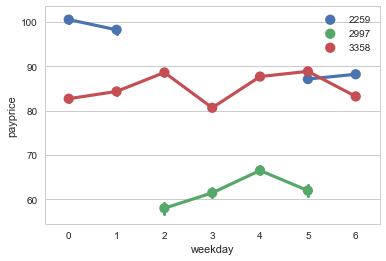

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.pointplot(x="weekday", y="payprice", hue="advertiser",
                   data=dataset)
plt.legend(loc=1)
plt.show()

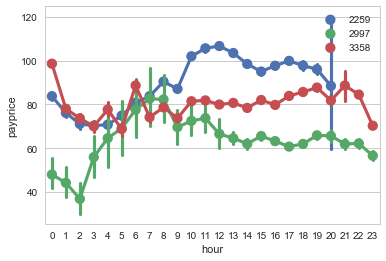

In [10]:
sns.set(style="whitegrid", color_codes=True)
sns.pointplot(x="hour", y="payprice", hue="advertiser",
                   data=dataset)
plt.legend(loc=1)
plt.show()

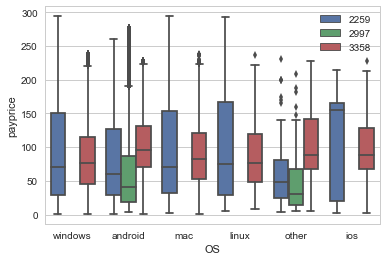

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="OS", y="payprice", hue="advertiser",
                   data=dataset)
plt.legend(loc=1)
plt.show()

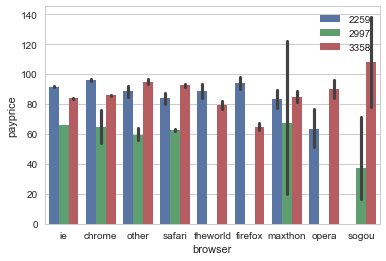

In [10]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="browser", y="payprice", hue="advertiser",
                   data=dataset)
plt.legend(loc=1)
plt.show()

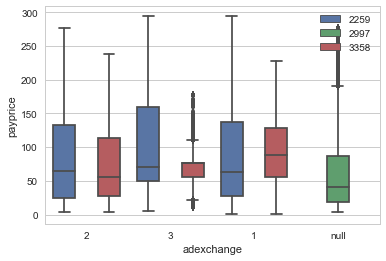

In [13]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="adexchange", y="payprice", hue="advertiser",
                   data=dataset)
plt.legend(loc=1)
plt.show()

# 3.User Feedback Analysis

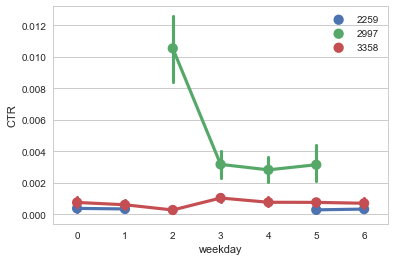

In [14]:
sns.set(style="whitegrid", color_codes=True)
sns.pointplot(x="weekday", y="click", hue="advertiser",
                   data=dataset)
plt.ylabel('CTR')
plt.legend(loc=1)
plt.show()

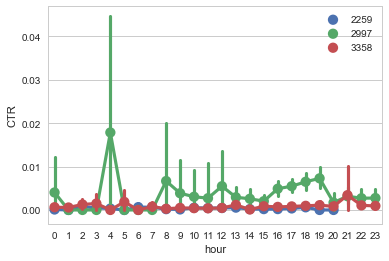

In [15]:
sns.set(style="whitegrid", color_codes=True)
sns.pointplot(x="hour", y="click", hue="advertiser",
                   data=dataset)
plt.ylabel('CTR')
plt.legend(loc=1)
plt.show()

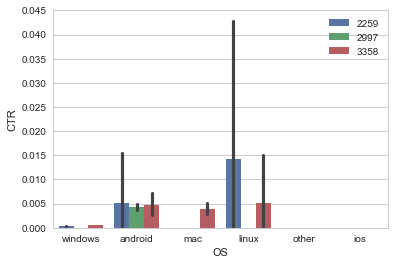

In [16]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="OS", y="click", hue="advertiser",
                   data=dataset)
plt.ylabel('CTR')
plt.legend(loc=1)
plt.show()

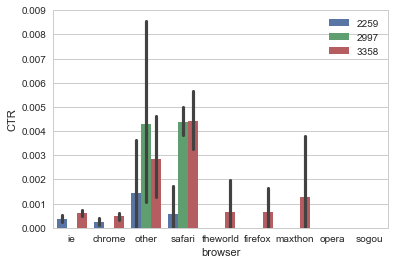

In [17]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="browser", y="click", hue="advertiser",
                   data=dataset)
plt.ylabel('CTR')
plt.legend(loc=1)
plt.show()

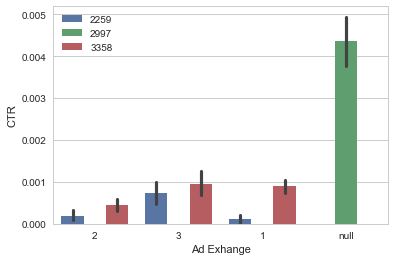

In [18]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="adexchange", y="click", hue="advertiser",
                   data=dataset)
plt.ylabel('CTR')
plt.xlabel('Ad Exhange')
plt.legend(loc=2)
plt.show()

# 4.Price Analysis

In [21]:
train.bidprice.describe(),train.payprice.describe(),train.slotprice.describe()

(count    2.418578e+06
 mean     2.728379e+02
 std      2.892883e+01
 min      2.270000e+02
 25%      2.410000e+02
 50%      2.940000e+02
 75%      3.000000e+02
 max      3.000000e+02
 Name: bidprice, dtype: float64, count    2.418578e+06
 mean     7.834378e+01
 std      5.987735e+01
 min      0.000000e+00
 25%      3.300000e+01
 50%      6.900000e+01
 75%      1.000000e+02
 max      3.000000e+02
 Name: payprice, dtype: float64, count    2.418578e+06
 mean     2.664071e+01
 std      3.702365e+01
 min      0.000000e+00
 25%      0.000000e+00
 50%      5.000000e+00
 75%      5.000000e+01
 max      2.990000e+02
 Name: slotprice, dtype: float64)

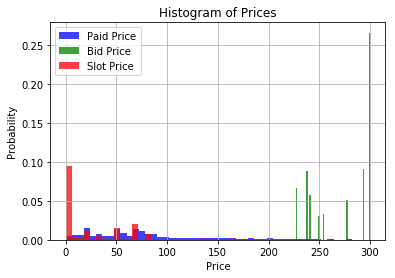

In [4]:
# Histograms of prices
n, bins, patches = plt.hist(train['payprice'],  50, normed=1, facecolor='blue', alpha=0.75, label='Paid Price')
n, bins, patches = plt.hist(train['bidprice'], 50, normed=1, facecolor='green', alpha=0.75, label='Bid Price')
n, bins, patches = plt.hist(train['slotprice'], 50, normed=1, facecolor='red', alpha=0.75, label='Slot Price')

plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Histogram of Prices')
plt.grid(True)
plt.legend()

plt.show() # Quite a discrepancy in bid and paid prices


# 5.Feature Correlation Analysis

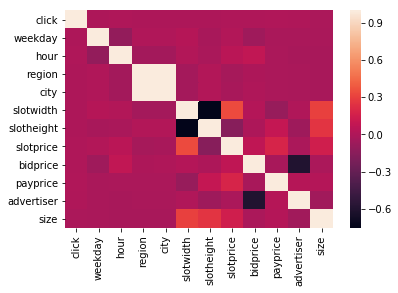

In [7]:
dataset=train.filter(items=['click', 'weekday', 'hour', 'userid', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'OS', 'browser'])
corr=train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()